In [4]:
import kagglehub
path = kagglehub.dataset_download("swaroopkml/cifar10-pngs-in-folders")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'cifar10-pngs-in-folders' dataset.
Path to dataset files: /kaggle/input/cifar10-pngs-in-folders


In [6]:
import os
path_dir = '/root/.cache/kagglehub/datasets/swaroopkml/cifar10-pngs-in-folders/versions/1'
print(os.listdir(path_dir))

['cifar10']


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_ds = datagen.flow_from_directory(
    '/root/.cache/kagglehub/datasets/swaroopkml/cifar10-pngs-in-folders/versions/1/cifar10/cifar10/train',
    target_size=(32,32),
    batch_size=32,
    subset='training',
    class_mode='categorical'
)

val_ds = datagen.flow_from_directory(
    '/root/.cache/kagglehub/datasets/swaroopkml/cifar10-pngs-in-folders/versions/1/cifar10/cifar10/test',
    target_size=(32,32),
    batch_size=32,
    subset='validation',
    class_mode='categorical'
)

classes = train_ds.class_indices
print("Classes:", classes)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds
)


Found 40000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Classes: {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 72s 56ms/step - accuracy: 0.3021 - loss: 1.8479 - val_accuracy: 0.5155 - val_loss: 1.3190
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 70s 56ms/step - accuracy: 0.5470 - loss: 1.2851 - val_accuracy: 0.5850 - val_loss: 1.1520
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 55ms/step - accuracy: 0.6050 - loss: 1.1114 - val_accuracy: 0.6335 - val_loss: 1.0126
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 55ms/step - accuracy: 0.6529 - loss: 0.9808 - val_accuracy: 0.6615 - val_loss: 0.9548
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 54ms/step - accuracy: 0.6882 - loss: 0.8919 - val_accuracy: 0.6885 - val_loss: 0.9343
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 55ms/step - accuracy: 0.7167 - loss: 0.8090 - val_accuracy: 0.6915 - val_loss

In [30]:
train_loss, train_accuracy = model.evaluate(train_ds, verbose=1)

print("Training Accuracy:", train_accuracy*100)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.9293 - loss: 0.2178
Training Accuracy: 92.96000003814697


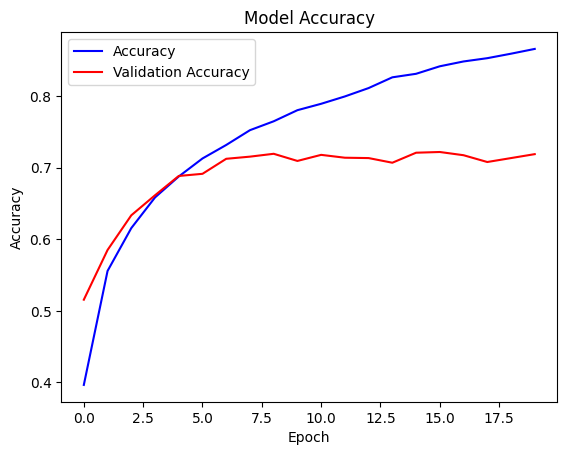

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='blue',label='Accuracy')
plt.plot(history.history['val_accuracy'],color='red',label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.legend()
plt.show()

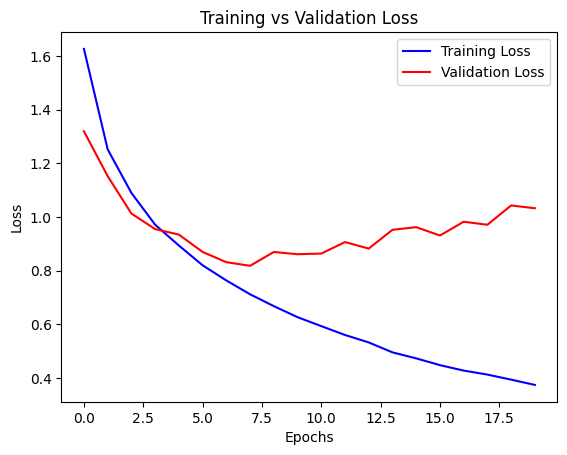

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='blue', label='Training Loss')
plt.plot(history.history['val_loss'], color='red', label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


In [39]:
import os
img_path = '/root/.cache/kagglehub/datasets/swaroopkml/cifar10-pngs-in-folders/versions/airplane1.png'
print("File exists:", os.path.exists(img_path))


File exists: True


In [40]:
import cv2
img = cv2.imread(img_path)
print("Image loaded:", img is not None)


Image loaded: True


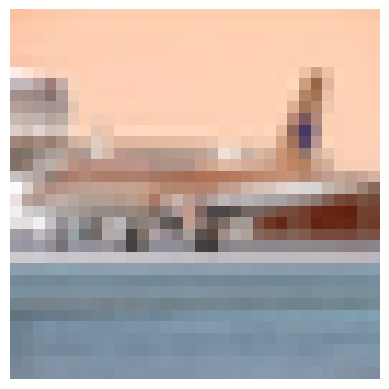

In [42]:
import matplotlib.pyplot as plt

if img is not None:
    # img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
else:
    print("Could not load image. Check path:", img_path)


In [38]:
import cv2
import numpy as np

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (32, 32))

img = img.astype("float32") / 255.0
img = np.expand_dims(img, axis=0)

pred = model.predict(img)
class_idx = np.argmax(pred)

class_names = list(train_ds.class_indices.keys())
print("Predicted class:", class_names[class_idx])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted class: airplane
